# Self Organizing Map

**1. Data Preprocessing**

In [1]:
pip install MiniSom

  Stored in directory: C:\Users\Lenovo\AppData\Local\pip\Cache\wheels\b8\c6\01\330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom
Note: you may need to restart the kernel to use updated packages.


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
# we want to identify the frauds
dataframe = pd.read_csv('Credit_Card_Applications.csv')
dataframe.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [99]:
X = dataframe.iloc[:, :-1].values
# SOM is an unsupervised deep learning, so we don't need 'y'
y = dataframe.iloc[:, -1].values

**Feature Scaling**

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
sc = MinMaxScaler(feature_range=(0, 1))

In [102]:
X = sc.fit_transform(X)

**2. Training the SOM**

In [103]:
from minisom import MiniSom

In [104]:
# input_len: 14 attribute + 1 client_id
# sigma: radius of different neighborhood in grid
# learning_rate: how much weights will be updated
# decay_function: use to improve convergence
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [105]:
som.random_weights_init(X)

Mean Interneuron Distance (MID): The mean of the distances of all the neurons
around the winning node inside the neighborhood we define with 'sigma'.<br>
**The more MID is higher, winning node will be farther -> outlier -> frauds**

In [106]:
som.train_random(data = X, num_iteration = 100)

**3. Visualizing**<br>
large MID is close more to white -> more fraud

In [107]:
from pylab import bone, pcolor, colorbar, plot, show

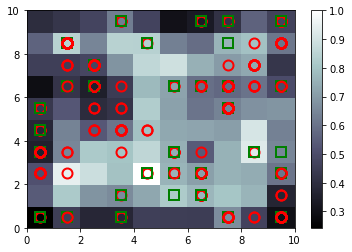

In [108]:
bone()
pcolor(som.distance_map().T)
colorbar()
# red: didn't get approval, green: get approval
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    # set marker in the middle of the squares     
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

**4. Finding the frauds**

In [109]:
mappings = som.win_map(X)

In [112]:
frauds = np.concatenate((mappings[(4, 2)], mappings[(1, 2)]), axis = 0)
# rescale
frauds = sc.inverse_transform(frauds)

In [116]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15777994.0,1.0,42.00,9.790,2.0,14.0,8.0,7.960,1.0,1.0,8.0,0.0,2.0,0.0,1.0
1,15585855.0,1.0,40.25,21.500,2.0,10.0,9.0,20.000,1.0,1.0,11.0,0.0,2.0,0.0,1201.0
2,15597536.0,1.0,27.67,2.000,2.0,14.0,8.0,1.000,1.0,1.0,4.0,0.0,2.0,140.0,7545.0
3,15661412.0,1.0,48.75,8.500,2.0,8.0,8.0,12.500,1.0,1.0,9.0,0.0,2.0,181.0,1656.0
4,15697310.0,1.0,41.17,4.040,2.0,13.0,8.0,7.000,1.0,1.0,8.0,0.0,2.0,320.0,1.0
5,15799785.0,1.0,56.42,28.000,1.0,8.0,4.0,28.500,1.0,1.0,40.0,0.0,2.0,0.0,16.0
6,15571284.0,1.0,32.83,2.500,2.0,13.0,8.0,2.750,1.0,1.0,6.0,0.0,2.0,160.0,2073.0
7,15570947.0,1.0,27.25,1.665,2.0,13.0,8.0,5.085,1.0,1.0,9.0,0.0,2.0,399.0,828.0
8,15589881.0,1.0,28.92,15.000,2.0,8.0,8.0,5.335,1.0,1.0,11.0,0.0,2.0,0.0,2284.0
9,15592326.0,1.0,23.17,11.125,2.0,14.0,8.0,0.460,1.0,1.0,1.0,0.0,2.0,100.0,1.0


In [115]:
print('Fraud Customer IDs:')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs:
15777994
15585855
15597536
15661412
15697310
15799785
15571284
15570947
15589881
15592326
15671293
15602456
15697844
15728082
15675176
15580579
15665374
15740356
15802869
